# Bobcat Population Analysis

In [11]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from numpy import random as rd

# Base variables and functions
identity_matrix = np.identity(16)
default_t0_population = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
default_number_of_years = 32

## Base Model

    Year   Population
0      0   160.000000
1      1   271.400000
2      2   332.848000
3      3   379.687520
4      4   441.904672
5      5   520.277415
6      6   613.780034
7      7   724.673710
8      8   856.271729
9      9  1012.274850
10    10  1197.023233
11    11  1415.702245
12    12  1674.476896
13    13  1980.652953
14    14  2342.881055
15    15  2771.400815
16    16  3278.340586
17    17  3877.868411
18    18  4586.924282
19    19  5425.618838
20    20  6417.690314


[Text(0.5, 1.0, 'Wild Bobcat Population')]

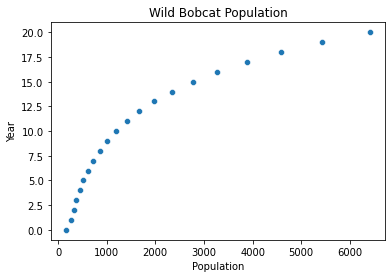

In [12]:
default_leslie_matrix = np.array([[0.6, 0.6, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15],
                         [0.32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.68, 0]])

def growth(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years):
    nth_population = np.zeros(number_of_years+1)
    nth_population[0] = np.sum(t0_population)
    nth_year = np.arange(number_of_years+1)
    for i in nth_year[1:number_of_years+1]:
        nth_population[i] =  np.sum(linalg.matrix_power(leslie_matrix, i).dot(t0_population))

    df = pd.DataFrame({
        'Year' : nth_year,
        'Population' : nth_population
        })

    print(df)

    return df

data_nth_population = growth()

sns.scatterplot(data = data_nth_population, x = "Population", y = "Year").set(title = "Wild Bobcat Population")

## In-situ Model

    Year    Population
0      0    160.000000
1      1    283.400000
2      2    364.551000
3      3    436.625020
4      4    533.537755
5      5    659.378462
6      6    816.476326
7      7   1011.801542
8      8   1254.810158
9      9   1556.937354
10    10   1932.309667
11    11   2398.526699
12    12   2977.476937
13    13   3696.349631
14    14   4588.910176
15    15   5697.086946
16    16   7072.962384
17    17   8780.820087
18    18  10900.820052
19    19  13532.641624
20    20  16799.935634


[Text(0.5, 1.0, 'In-Situ Bobcat Population')]

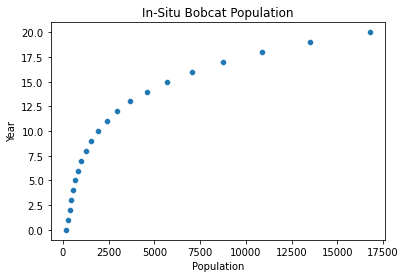

In [13]:
leslie_matrix_extended = np.array([[0.63, 0.63, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
                         [0.34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0, 0],
                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.71, 0]])

data_nth_population_extended = growth(leslie_matrix = leslie_matrix_extended)

sns.scatterplot(data = data_nth_population_extended, x = "Population", y = "Year").set(title = "In-Situ Bobcat Population")

## Extended Model

In [14]:
default_catastrophie_matrix = np.identity(16)
for i in range(0,16):
    default_catastrophie_matrix[i][i] = 0.1

def growth_extended(t0_population = default_t0_population, leslie_matrix = default_leslie_matrix, number_of_years = default_number_of_years, catastrophie_matrix = default_catastrophie_matrix):
    
    return